In [1]:
from langchain_core.messages import HumanMessage
from IPython.display import Image, display

from calc_agent import calculator_agent

%reload_ext autoreload
%autoreload 2

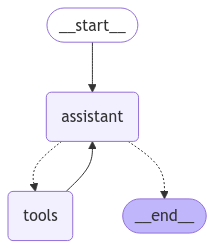

In [2]:
display(Image(calculator_agent.get_graph(xray=True).draw_mermaid_png()))

In [3]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

Python REPL can execute arbitrary code. Use with caution.


================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_klxpbKBsjqdlgpYTPg7pDgR6)
 Call ID: call_klxpbKBsjqdlgpYTPg7pDgR6
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Add 3 and 4.
================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_klxpbKBsjqdlgpYTPg7pDgR6)
 Call ID: call_klxpbKBsjqdlgpYTPg7pDgR6
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

========================

In [4]:
messages['messages'][0].pretty_print()

In [5]:
calculator_agent.get_state(config).values['messages'][3]

AIMessage(content='The sum of 3 and 4 is 7.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 705, 'total_tokens': 719, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'stop', 'logprobs': None}, id='run-2ef167e1-79d7-4b39-ae6d-b114fcb64fc4-0', usage_metadata={'input_tokens': 705, 'output_tokens': 14, 'total_tokens': 719, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
for m in calculator_agent.get_state(config).values['messages']:
    m.pretty_print()

In [7]:
messages = [HumanMessage(content="Multiply that by 2.")]

# Run
messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

In [8]:
messages

{'messages': [HumanMessage(content='Add 3 and 4.', additional_kwargs={}, response_metadata={}, id='9979d6d3-7f3e-431e-8813-37cd88f2093a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_klxpbKBsjqdlgpYTPg7pDgR6', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 679, 'total_tokens': 697, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-23b1dfe9-6734-462b-bd7b-d7a213305e56-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'call_klxpbKBsjqdlgpYTPg7pDgR6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 679, 'output_tokens': 18, 'total_t

In [9]:
calculator_agent.get_state(config).values['execution_environment']

{'result': 14}

In [10]:
messages = [HumanMessage(content="Add 2 and 3, then multiply by 4 and compute the result squared.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

In [11]:
messages = [HumanMessage(content="Make a random dataframe with 10 rows and 3 columns.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

TypeError: Object of type DataFrame is not serializable